In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [3]:
df = pd.read_csv("selected_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 7)
(38799, 7)


In [4]:
df = pd.read_csv("functional_group_selected_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 3)
(290, 3)


<Axes: >

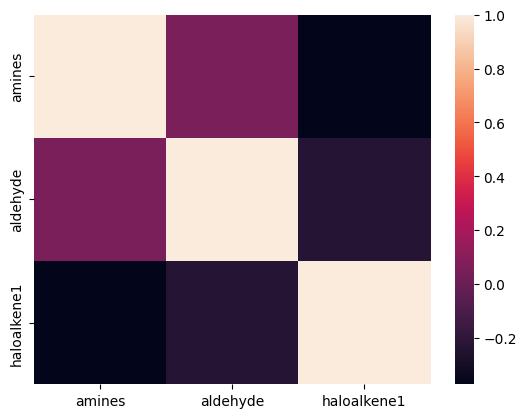

In [5]:
sns.heatmap(df.corr())

In [8]:
X = df.values
model = SOM(m = 3,
            n = 1, 
            dim=X.shape[1],
            max_iter=1,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=5)
model.fit(X, epoch=50)
model.neurons

array([[[1, 3, 7]],

       [[6, 4, 2]],

       [[2, 6, 2]]], dtype=int64)

In [9]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 3)

In [10]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,amines,aldehyde,haloalkene1
0,1,3,7
1,6,4,2
2,2,6,2


In [8]:
cc.round(4).to_excel("Datas/fn_group_SOM++_clustercenters.xlsx", index=False)
cc.round(4).to_csv("fn_group_clustercenters.csv", index=False)